In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df =pd.read_csv(r'winequality-red.csv')
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [6]:
df.quality.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

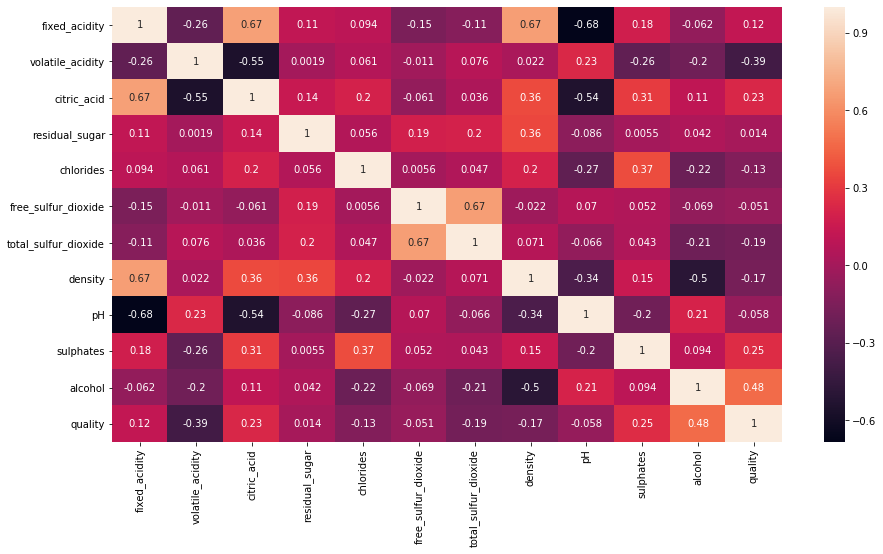

In [9]:
plt.figure(figsize = (15,8))
sns.heatmap(df.corr(),annot =True)

In [ ]:
sns.pairplot(df,diag_kind='hist',hue ='quality')

In [14]:
y = df.drop(columns='quality')

In [22]:
from scipy.stats import zscore
y_scaled = y.apply(zscore)

In [13]:
from scipy.cluster.hierarchy import linkage,dendrogram

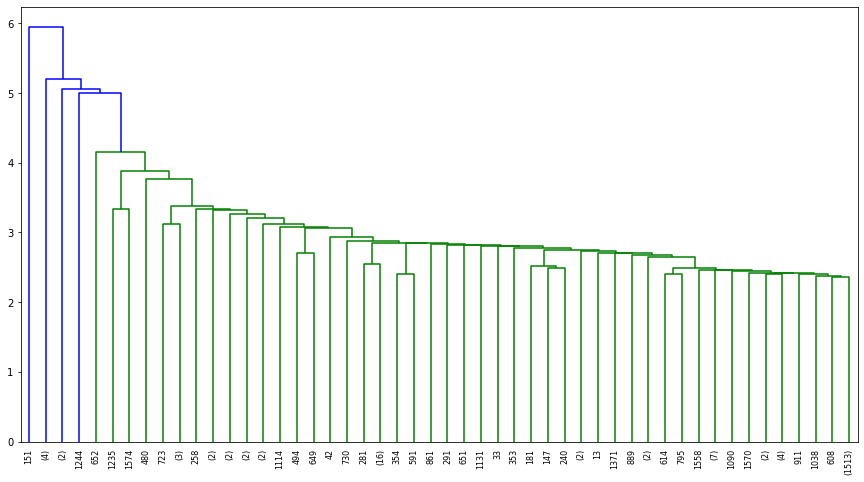

In [25]:
z = linkage(y_scaled,)
plt.figure(figsize = (15,8))

dendrogram(z,truncate_mode='lastp',p =50)
plt.show()

In [ ]:
#here we are more likely to  take 5 clusters depending on the verticle height of the 

In [27]:
from sklearn.cluster import AgglomerativeClustering
agg =AgglomerativeClustering(n_clusters=5)
ylab = agg.fit_predict(y_scaled)

In [28]:
ylab

array([1, 1, 1, ..., 2, 2, 0], dtype=int64)

In [30]:
ylabdf = pd.DataFrame(ylab)
ylabdf.rename(columns ={0:'labels'},inplace =True)

In [31]:
y =y.join(ylabdf)

In [32]:
y.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,labels
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,2
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,1


In [33]:
y.labels.value_counts()

1    530
2    485
0    452
4     99
3     33
Name: labels, dtype: int64

In [34]:
df.quality.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [37]:
x = y.drop(columns='labels')
y = y.labels

In [35]:
from sklearn.model_selection import train_test_split

In [38]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [53]:
from sklearn.neighbors import KNeighborsClassifier
knn =KNeighborsClassifier(n_neighbors=8)

In [58]:
knn.fit(X_train,y_train)
ypredknn = knn.predict(X_test)
ytrainpredknn = knn.predict(X_train)
from sklearn.metrics import accuracy_score
test_acc =accuracy_score(y_test,ypredknn)
train_acc =accuracy_score(y_train,ytrainpredknn)
test_acc,train_acc

(0.7556818181818182, 0.7833800186741363)

In [80]:
from sklearn.ensemble import RandomForestClassifier
rf =RandomForestClassifier(n_estimators=100,criterion='entropy',max_depth=7,min_samples_split=5)
rf.fit(X_train,y_train)
ypredrf = rf.predict(X_test)
ytrainpredrf = rf.predict(X_train)
from sklearn.metrics import accuracy_score
test_acc =accuracy_score(y_test,ypredrf)
train_acc =accuracy_score(y_train,ytrainpredrf)
test_acc,train_acc

(0.9166666666666666, 0.976657329598506)

In [87]:
from sklearn.tree import DecisionTreeClassifier
dt =DecisionTreeClassifier(criterion='entropy',max_depth=8,min_samples_split=5)
dt.fit(X_train,y_train)
ypredrf = dt.predict(X_test)
ytrainpredrf = dt.predict(X_train)
from sklearn.metrics import accuracy_score
test_acc =accuracy_score(y_test,ypredrf)
train_acc =accuracy_score(y_train,ytrainpredrf)
test_acc,train_acc

(0.8693181818181818, 0.9738562091503268)

In [88]:
from sklearn.linear_model import LogisticRegression

In [117]:
Lr =LogisticRegression(multi_class='ovr').fit(X_train,y_train)# by using one vs rest

C:\Users\SRK\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\SRK\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regress

In [119]:
ypredrf = Lr.predict(X_test)
ytrainpredrf = Lr.predict(X_train)
from sklearn.metrics import accuracy_score
test_acc =accuracy_score(y_test,ypredrf)
train_acc =accuracy_score(y_train,ytrainpredrf)
test_acc,train_acc

(0.8863636363636364, 0.8823529411764706)

In [120]:
df1 =pd.DataFrame(ytrainpredrf)
df1.rename(columns ={0:'target'},inplace =True)

In [121]:
df1['target'].value_counts()

1    389
2    341
0    288
4     46
3      7
Name: target, dtype: int64

In [ ]:
So, we got a best model using random forest using 5 clusters in quality.